In [8]:
import neurite as ne
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def meshgridnd_like(in_img, rng_func=range):
    new_shape = list(in_img.shape)
    all_range = [rng_func(i_len) for i_len in new_shape]
    return tuple([x_arr.swapaxes(0, 1) for x_arr in np.meshgrid(*all_range)])

def get_quiver_plot(flow_field, ds_factor = 20):
    """
    Params:
    flow_field: deformation field in the form of np.array: e.g., (512,512,112,3)
    ds_factor = an integer indicating the sparsity of the arrows in the quiver plot
    """
    DS_FACTOR = ds_factor
    flow = np.moveaxis(flow_field, 0, -1)

    c_xx, c_yy, c_zz = [x.flatten()
                        for x in
                        meshgridnd_like(flow[::DS_FACTOR, ::DS_FACTOR, ::DS_FACTOR, 0])]

    get_flow = lambda i: flow[::DS_FACTOR, ::DS_FACTOR, ::DS_FACTOR, i].flatten()

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    ax.quiver(c_xx,
              c_yy,
              c_zz,
              get_flow(0),
              get_flow(1),
              get_flow(2),
              length=0.9,
              normalize=True)
    return fig

In [151]:
def meshgridnd_like(in_img):
    new_shape = list(in_img.shape)
    all_range = [range(i_len) for i_len in new_shape]
    # print(all_range.shape)
    return tuple([x_arr for x_arr in np.meshgrid(*all_range)])

In [182]:
def get_2d_quiver(flow_2d, sp_factor = 20):
    """
    flow_2d: Flow filed in 2d+3 format. Example (512,512,3)
    sp_factor = sparsity factor.
    """
    spatial_flow = flow_2d[:, :, 0:2]
    meshg = meshgridnd_like(spatial_flow[::sp_factor, ::sp_factor, 0])
    mesh = np.asarray(meshg)
    mesh_mv = np.moveaxis(mesh, 0, -1)
    meshX = mesh_mv[:, :, 0]
    meshY = mesh_mv[:, :, 1]


    flowX_2d = flow_2d[::sp_factor, ::sp_factor, 0]
    flowY_2d = flow_2d[::sp_factor, ::sp_factor, 1]
    flowZ_2d = flow_2d[::sp_factor, ::sp_factor, 2]

    fig, ax = plt.subplots(figsize=(10,10))

    ax.quiver(meshX, meshY, flowX_2d, flowY_2d, flowZ_2d )

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_aspect('equal')

    plt.show()


In [183]:
flow_path = "../scripts/flow_npy/flow_HCC_1177_p.npy"
flow_np = np.load(flow_path)



(512, 512, 2)

In [194]:
mv_flow_np = np.rot90(np.moveaxis(flow_np, 0, 2))
flow_slice_60 = mv_flow_np[:, :, :, 34]
# flow_slice_60.shape
# mv_flow_np.shape
flow_slice_60.shape

(512, 512, 3)

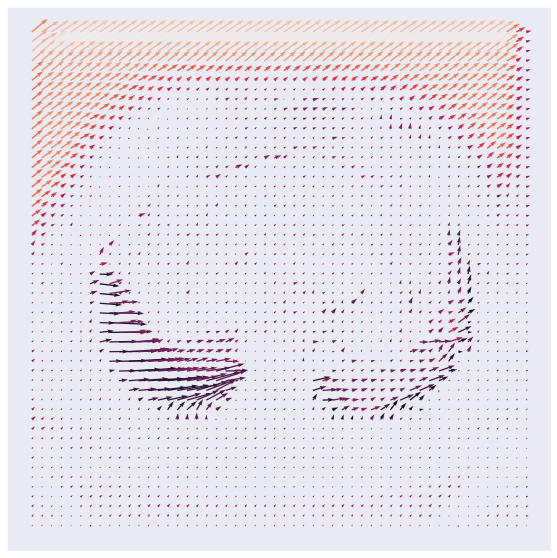

In [195]:
get_2d_quiver(flow_slice_60, sp_factor=10)

In [165]:
meshg = meshgridnd_like(flow_slice_60[::18, ::18, 0 ])
mesh = np.asarray(meshg)
mesh_mv = np.moveaxis(mesh, 0, -1)
print(mesh_mv.shape)
meshX = mesh_mv[:, :, 0]
meshY = mesh_mv[:, :, 1]
meshX.shape

(29, 29, 2)


(29, 29)

In [178]:
flowX_2d = mv_flow_np[::18, ::18, 0, 59]
flowY_2d = mv_flow_np[::18, ::18, 1, 59]
flowZ_2d = mv_flow_np[::18, ::18, 2, 59]
print(flowX_2d.shape)
print(flowY_2d.shape)

(29, 29)
(29, 29)


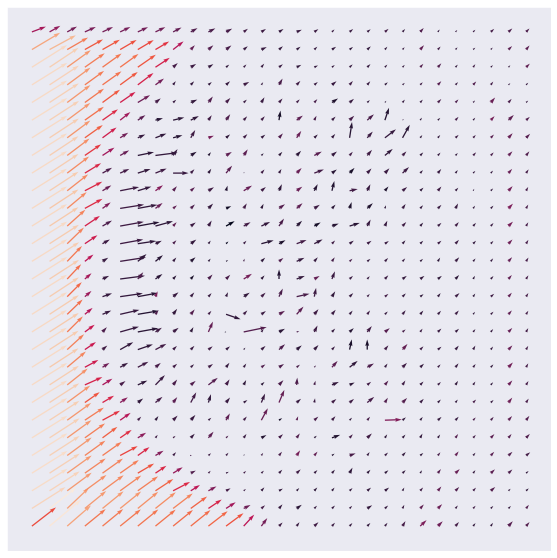

In [179]:
fig, ax = plt.subplots(figsize=(10,10))
# dx, dy = np.gradient(flowX_2d)
ax.quiver(meshX, meshY, flowX_2d, flowY_2d, flowZ_2d )

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

In [65]:
get_flow = lambda i: mv_flow_np[::16, ::16, ::16, i]
fl = get_flow(2)
fl.shape

(32, 32, 1)

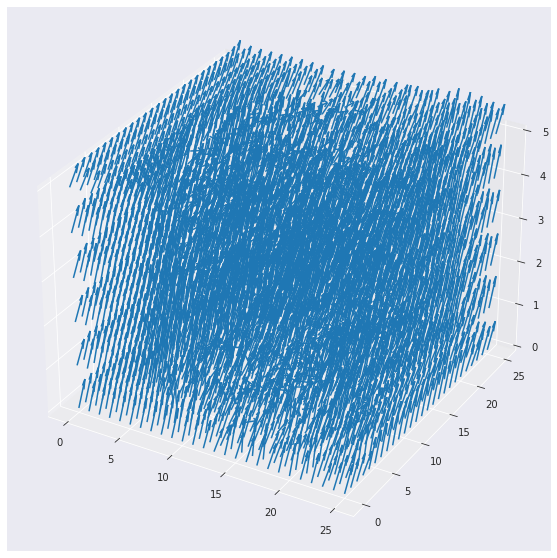

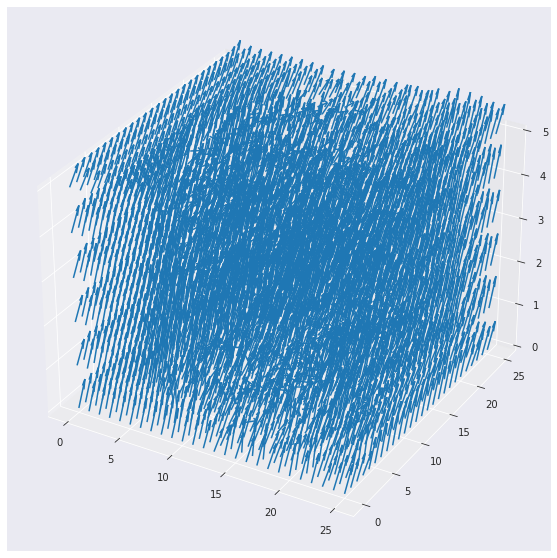

In [171]:
get_quiver_plot(flow_np, ds_factor=20)

In [18]:
ne.plot.flow([flow_slice_60])

AssertionError: each slice has to be 3d: 2d+2 channels

ValueError: too many values to unpack (expected 2)

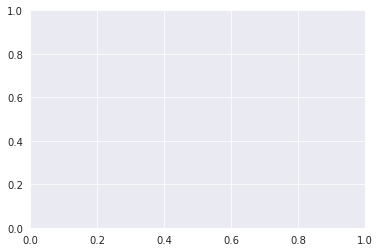

In [11]:
plt.quiver(mv_flow_np[0], mv_flow_np[1], mv_flow_np[2])

(21,)
(21, 21)
(21, 21)
z shape (21, 21)
(21, 21)
color array (21, 21)


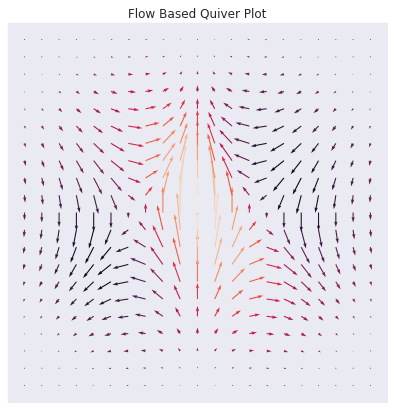

In [173]:
x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)
print(x.shape)


X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)
z = X*np.exp(-X**2 -Y**2)
print('z shape', z.shape)
dx, dy = np.gradient(z)
print(dx.shape)

n = -2
color_array = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2)
print("color array", color_array.shape)

fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(X,Y,dx,dy,color_array)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')
plt.title("Flow Based Quiver Plot")

plt.show()